In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Cau 1

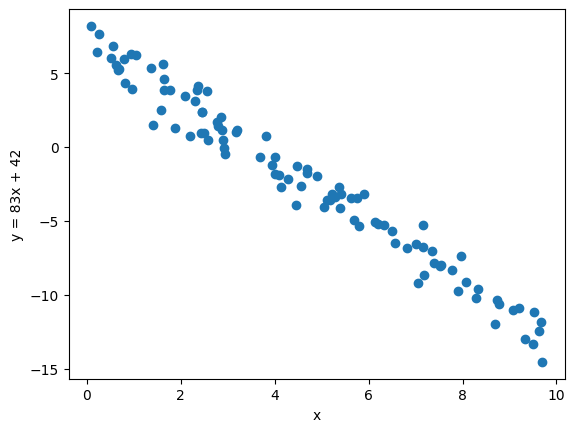

In [43]:
# So diem du lieu
n_points = 100
# Tao du lieu random
X = 10 * np.random.rand(n_points, 1)
y = -2 * X + 7 + np.random.randn(n_points, 1)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y = " + str(a)+"x + " + str(b))
plt.show()

In [44]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        input_size = 1
        output_size = 1
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

Epoch [1/1000], Loss: 39.7410
Epoch [2/1000], Loss: 16.5336
Epoch [3/1000], Loss: 12.5048
Epoch [4/1000], Loss: 11.7293
Epoch [5/1000], Loss: 11.5064
Epoch [6/1000], Loss: 11.3782
Epoch [7/1000], Loss: 11.2670
Epoch [8/1000], Loss: 11.1597
Epoch [9/1000], Loss: 11.0539
Epoch [10/1000], Loss: 10.9492
Epoch [11/1000], Loss: 10.8457
Epoch [12/1000], Loss: 10.7432
Epoch [13/1000], Loss: 10.6419
Epoch [14/1000], Loss: 10.5415
Epoch [15/1000], Loss: 10.4422
Epoch [16/1000], Loss: 10.3440
Epoch [17/1000], Loss: 10.2467
Epoch [18/1000], Loss: 10.1505
Epoch [19/1000], Loss: 10.0553
Epoch [20/1000], Loss: 9.9610
Epoch [21/1000], Loss: 9.8678
Epoch [22/1000], Loss: 9.7755
Epoch [23/1000], Loss: 9.6842
Epoch [24/1000], Loss: 9.5938
Epoch [25/1000], Loss: 9.5044
Epoch [26/1000], Loss: 9.4158
Epoch [27/1000], Loss: 9.3283
Epoch [28/1000], Loss: 9.2416
Epoch [29/1000], Loss: 9.1558
Epoch [30/1000], Loss: 9.0709
Epoch [31/1000], Loss: 8.9869
Epoch [32/1000], Loss: 8.9038
Epoch [33/1000], Loss: 8.8215


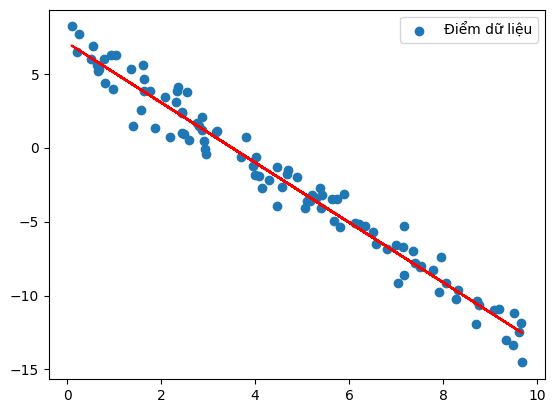

In [45]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Điểm dữ liệu')
plt.plot(X, predicted, 'r-')
plt.legend()
plt.show()


# Cau 2

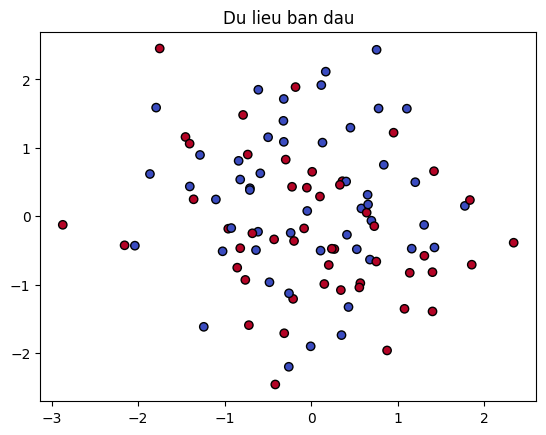

In [53]:
X = np.random.randn(100, 2)
y = np.random.randint(2, size=(100, 1))

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

predicted = model(X_tensor).detach().numpy()
predicted_class = np.round(predicted)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Du lieu ban dau')
plt.show()

In [54]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [55]:
model = LogisticRegression()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 0.7822
Epoch [2/1000], Loss: 0.7816
Epoch [3/1000], Loss: 0.7810
Epoch [4/1000], Loss: 0.7804
Epoch [5/1000], Loss: 0.7798
Epoch [6/1000], Loss: 0.7792
Epoch [7/1000], Loss: 0.7786
Epoch [8/1000], Loss: 0.7779
Epoch [9/1000], Loss: 0.7773
Epoch [10/1000], Loss: 0.7768
Epoch [11/1000], Loss: 0.7762
Epoch [12/1000], Loss: 0.7756
Epoch [13/1000], Loss: 0.7750
Epoch [14/1000], Loss: 0.7744
Epoch [15/1000], Loss: 0.7738
Epoch [16/1000], Loss: 0.7732
Epoch [17/1000], Loss: 0.7726
Epoch [18/1000], Loss: 0.7721
Epoch [19/1000], Loss: 0.7715
Epoch [20/1000], Loss: 0.7709
Epoch [21/1000], Loss: 0.7704
Epoch [22/1000], Loss: 0.7698
Epoch [23/1000], Loss: 0.7692
Epoch [24/1000], Loss: 0.7687
Epoch [25/1000], Loss: 0.7681
Epoch [26/1000], Loss: 0.7676
Epoch [27/1000], Loss: 0.7670
Epoch [28/1000], Loss: 0.7665
Epoch [29/1000], Loss: 0.7659
Epoch [30/1000], Loss: 0.7654
Epoch [31/1000], Loss: 0.7649
Epoch [32/1000], Loss: 0.7643
Epoch [33/1000], Loss: 0.7638
Epoch [34/1000], Lo

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 4.

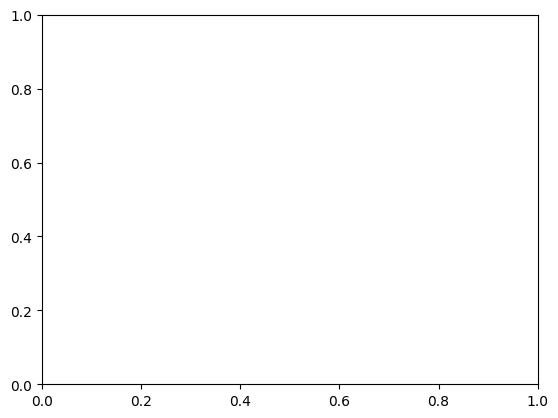

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_class.flatten(), cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Du lieu sau khi du doan')
plt.show()

# cau 3

In [62]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [63]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [68]:
model = XORModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000):    
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/10000, Loss: {loss.item():.4f}')

Epoch 1/10000, Loss: 0.2532
Epoch 2/10000, Loss: 0.2530
Epoch 3/10000, Loss: 0.2529
Epoch 4/10000, Loss: 0.2528
Epoch 5/10000, Loss: 0.2527
Epoch 6/10000, Loss: 0.2526
Epoch 7/10000, Loss: 0.2525
Epoch 8/10000, Loss: 0.2524
Epoch 9/10000, Loss: 0.2523
Epoch 10/10000, Loss: 0.2522
Epoch 11/10000, Loss: 0.2521
Epoch 12/10000, Loss: 0.2520
Epoch 13/10000, Loss: 0.2519
Epoch 14/10000, Loss: 0.2518
Epoch 15/10000, Loss: 0.2518
Epoch 16/10000, Loss: 0.2517
Epoch 17/10000, Loss: 0.2516
Epoch 18/10000, Loss: 0.2516
Epoch 19/10000, Loss: 0.2515
Epoch 20/10000, Loss: 0.2514
Epoch 21/10000, Loss: 0.2514
Epoch 22/10000, Loss: 0.2513
Epoch 23/10000, Loss: 0.2513
Epoch 24/10000, Loss: 0.2512
Epoch 25/10000, Loss: 0.2512
Epoch 26/10000, Loss: 0.2511
Epoch 27/10000, Loss: 0.2511
Epoch 28/10000, Loss: 0.2510
Epoch 29/10000, Loss: 0.2510
Epoch 30/10000, Loss: 0.2510
Epoch 31/10000, Loss: 0.2509
Epoch 32/10000, Loss: 0.2509
Epoch 33/10000, Loss: 0.2508
Epoch 34/10000, Loss: 0.2508
Epoch 35/10000, Loss: 0